In [126]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
sns.set_style("whitegrid")

# Load data
data = np.load('md_ir_spectrum.npz')
print(f"Data keys: {list(data.keys())}")

# # Setup figure
# fig, axes = plt.subplots(2, 1, figsize=(14, 10))




Data keys: ['frequencies', 'intensities', 'intensity_physnet', 'intensity_dcmnet', 'autocorrelation', 'times']


Data keys: ['frequencies', 'intensities', 'intensity_physnet', 'intensity_dcmnet', 'autocorrelation', 'times']
array[100001] 0.8Mb x∈[0., 1.000] μ=0.000 σ=0.007
array[100001] 0.8Mb x∈[0., 1.000] μ=0.000 σ=0.007
array[100001] 0.8Mb x∈[0., 6.671e+04] μ=3.336e+04 σ=1.926e+04
array[99992] 0.8Mb x∈[0.150, 3.335e+03] μ=1.668e+03 σ=962.840
array[99992] 0.8Mb x∈[3.021e-14, 0.571] μ=0.000 σ=0.005
array[99992] 0.8Mb x∈[2.463e-14, 0.571] μ=0.000 σ=0.005


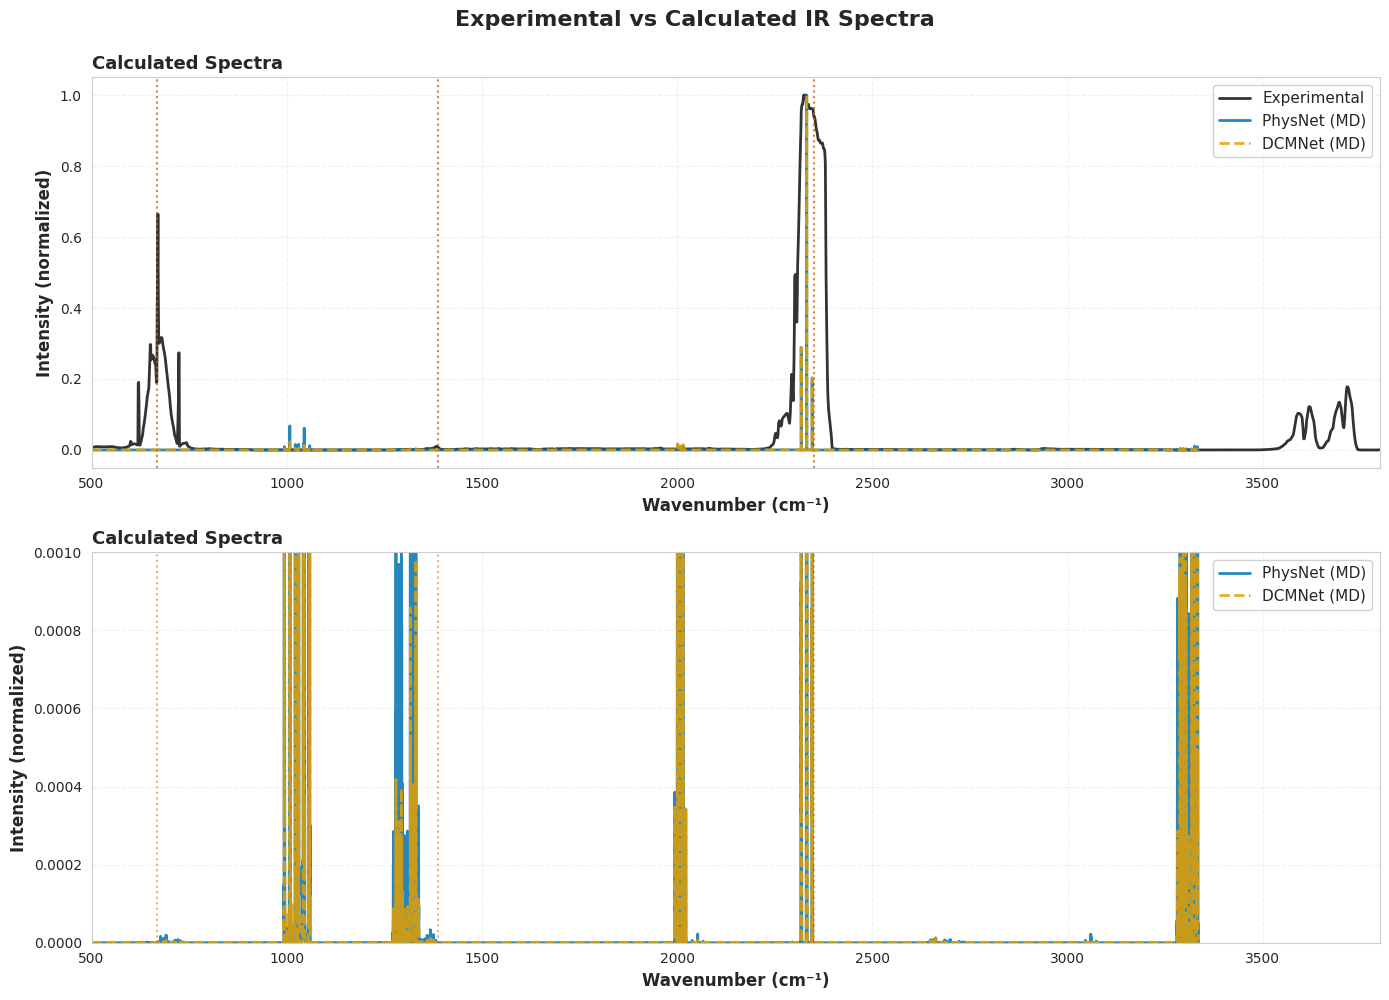


✅ DONE


In [ ]:
# Okabe-Ito colorblind-friendly palette
colors = {
    'orange': '#E69F00',
    'sky_blue': '#56B4E9', 
    'bluish_green': '#009E73',
    'yellow': '#F0E442',
    'blue': '#0072B2',
    'vermillion': '#D55E00',
    'reddish_purple': '#CC79A7',
    'black': '#000000'
}

def rolling_average(data, window_size=10):
    """Apply rolling average smoothing"""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Load MD IR spectrum data
data = np.load('md_ir_spectrum.npz')
print(f"Data keys: {list(data.keys())}")
import lovely_numpy as lnp
print(lnp.lovely(data['intensity_physnet']))
print(lnp.lovely(data['intensity_dcmnet']))
print(lnp.lovely(data['frequencies']))

# # Zero out low-frequency noise
data['intensity_physnet'][0] = 0
data['intensity_dcmnet'][0] = 0

# Apply smoothing
freqs = rolling_average(data['frequencies'])/20
int_phys = rolling_average(data['intensity_physnet'])
int_dcm = rolling_average(data['intensity_dcmnet'])
import lovely_numpy as lnp
print(lnp.lovely(freqs))
print(lnp.lovely(int_phys))
print(lnp.lovely(int_dcm))
# Experimental CO2 frequencies (fundamental + combination/overtone bands)
exp_co2 = [
    ('ν₂ Bending', 667.4),           # Fundamental bend
    ('ν₁ Symmetric Stretch', 1388.2), # Fundamental symmetric stretch
    ('ν₃ Asymmetric Stretch', 2349.2),# Fundamental asymmetric stretch
    ('2ν₂ + ν₃ Combination', 3715.0)  # Combination band
]

exp_data = np.load('../experimental_co2_ir.npz', allow_pickle=True)
exp_freq = exp_data['wavenumbers']
exp_abs = exp_data['absorbance']

fig, axes = plt.subplots(2, 1, figsize=(14, 10))
fig.suptitle('Experimental vs Calculated IR Spectra', fontsize=16, weight='bold', y=0.995)

# Plot 1: Experimental
ax = axes[0]
ax.plot(exp_freq, exp_abs/exp_abs.max(), 
        color=colors['black'], lw=2, label='Experimental', alpha=0.8)
for name, freq in exp_co2:
    ax.axvline(freq, color=colors['vermillion'], ls=':', lw=1.5, alpha=0.5)
ax.set_xlabel('Wavenumber (cm⁻¹)', fontsize=12, weight='bold')
ax.set_ylabel('Absorbance (normalized)', fontsize=12, weight='bold')
ax.set_title('Experimental Spectrum', fontsize=13, weight='bold', loc='left')
ax.legend(fontsize=11, framealpha=0.9)
ax.grid(True, alpha=0.3, ls='--')
ax.set_xlim(500, 3800)

mask_calc = (freqs > 500) & (freqs < 5000)

# Plot 2: Calculated (both models)
for ax in axes:
    ax.plot(freqs[mask_calc], int_phys[mask_calc]/int_phys[mask_calc].max(),
            color=colors['blue'], lw=2, label='PhysNet (MD)', alpha=0.85)
    ax.plot(freqs[mask_calc], int_dcm[mask_calc]/int_dcm[mask_calc].max(),
            color=colors['orange'], lw=2, ls='--', label='DCMNet (MD)', alpha=0.85)
    for name, freq in exp_co2:
        ax.axvline(freq, color=colors['vermillion'], ls=':', lw=1.5, alpha=0.5)
    ax.set_xlabel('Wavenumber (cm⁻¹)', fontsize=12, weight='bold')
    ax.set_ylabel('Intensity (normalized)', fontsize=12, weight='bold')
    ax.set_title('Calculated Spectra', fontsize=13, weight='bold', loc='left')
    ax.legend(fontsize=11, framealpha=0.9)
    ax.grid(True, alpha=0.3, ls='--')
    ax.set_xlim(500, 3800)


ax.set_xlim(500, 3800)
ax.set_ylim(0, 0.01)
plt.tight_layout()
plt.show()

print(f"\n{'='*70}")
print(f"✅ DONE")
print(f"{'='*70}")



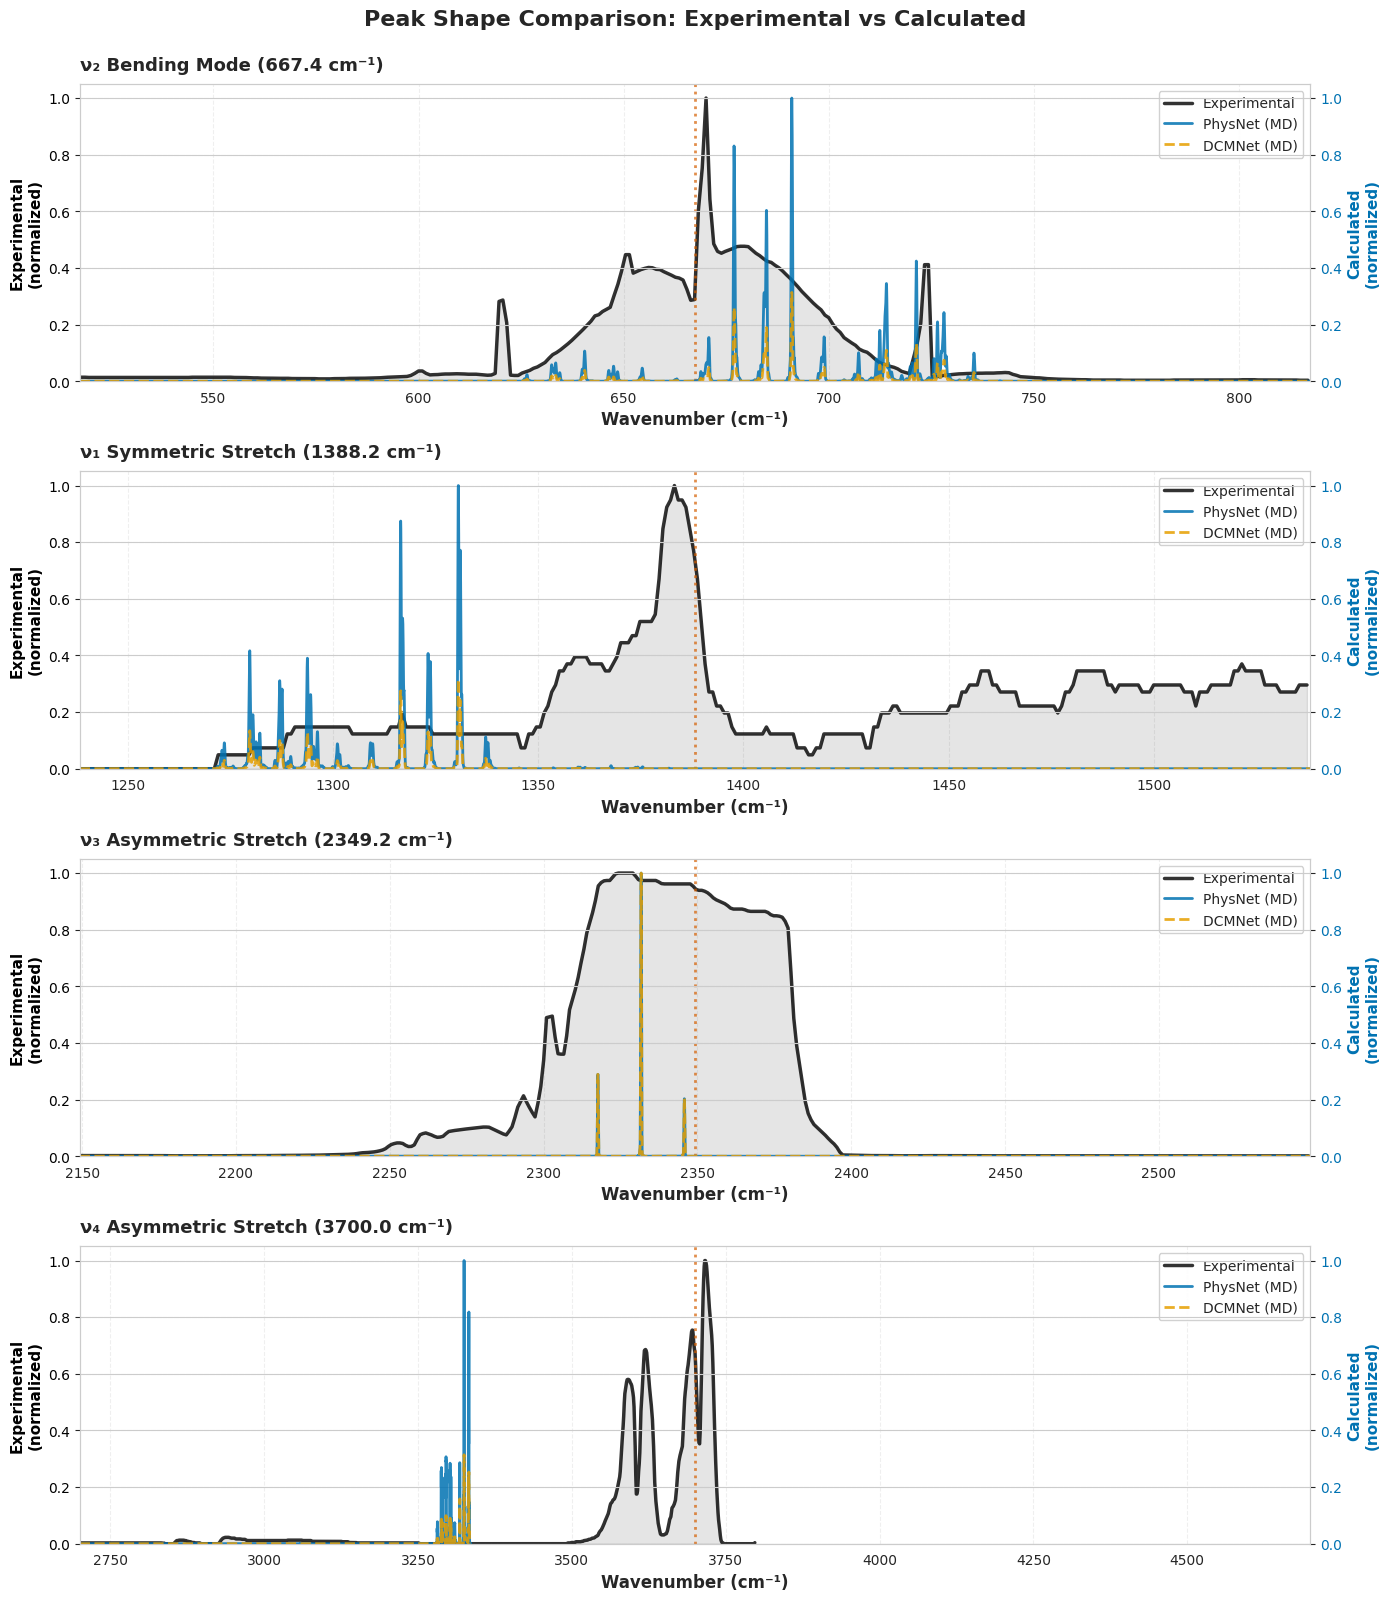


PEAK SHAPE COMPARISON

💡 Each panel shows:
   • Left axis (black): Experimental spectrum (normalized per region)
   • Right axis (blue/orange): Calculated spectra (normalized per region)
   • Red dotted line: Expected peak position

📊 Analysis:

  ν₂ Bending Mode (667.4 cm⁻¹):
    PhysNet peak at:    691.0 cm⁻¹  (Δ =  +23.6 cm⁻¹)
    DCMNet peak at:     691.0 cm⁻¹  (Δ =  +23.6 cm⁻¹)
    Max intensity:    1.123724e-05 (PhysNet), 3.522128e-06 (DCMNet)

  ν₁ Symmetric Stretch (1388.2 cm⁻¹):
    PhysNet peak at:   1330.5 cm⁻¹  (Δ =  -57.7 cm⁻¹)
    DCMNet peak at:    1330.5 cm⁻¹  (Δ =  -57.7 cm⁻¹)
    Max intensity:    1.779598e-03 (PhysNet), 5.600043e-04 (DCMNet)

  ν₃ Asymmetric Stretch (2349.2 cm⁻¹):
    PhysNet peak at:   2331.7 cm⁻¹  (Δ =  -17.5 cm⁻¹)
    DCMNet peak at:    2331.7 cm⁻¹  (Δ =  -17.5 cm⁻¹)
    Max intensity:    5.705490e-01 (PhysNet), 5.705312e-01 (DCMNet)

  ν₄ Asymmetric Stretch (3700.0 cm⁻¹):
    PhysNet peak at:   3324.7 cm⁻¹  (Δ = -375.3 cm⁻¹)
    DCMNet peak at: 

In [ ]:
# ===========================================================================
# Figure 3: Automated zoom-in comparison for each CO2 peak
# ===========================================================================

# Define regions of interest around experimental CO2 peaks (frequency, window_size, name)
peak_regions = [
    (667.4, 150, 'ν₂ Bending'),               # Fundamental bend
    (1388.2, 150, 'ν₁ Symmetric Stretch'),    # Fundamental symmetric stretch
    (2349.2, 200, 'ν₃ Asymmetric Stretch'),   # Fundamental asymmetric stretch
    (3715.0, 250, '2ν₂ + ν₃ Combination')     # Combination band
]

fig, axes = plt.subplots(len(peak_regions), 1, figsize=(14, 4*len(peak_regions)))
fig.suptitle('Peak Shape Comparison: Experimental vs Calculated', 
             fontsize=16, weight='bold', y=0.998)

for idx, (peak_freq, window, name) in enumerate(peak_regions):
    ax = axes[idx]
    
    # Define frequency window
    freq_min = peak_freq - window
    freq_max = peak_freq + window
    
    # Mask experimental data
    exp_mask = (exp_freq >= freq_min) & (exp_freq <= freq_max)
    exp_f = exp_freq[exp_mask]
    exp_a = exp_abs[exp_mask]
    
    # Mask calculated data
    calc_mask = (freqs >= freq_min) & (freqs <= freq_max)
    calc_f = freqs[calc_mask]
    calc_p = int_phys[calc_mask]
    calc_d = int_dcm[calc_mask]
    
    # Create dual y-axis
    ax2 = ax.twinx()
    
    # Plot experimental on left axis (normalized in this region)
    if len(exp_f) > 0 and exp_a.max() > 0:
        ax.plot(exp_f, exp_a / exp_a.max(), 
                color=colors['black'], lw=2.5, label='Experimental', alpha=0.8, zorder=3)
        ax.fill_between(exp_f, 0, exp_a / exp_a.max(), 
                        color=colors['black'], alpha=0.1, zorder=1)
    
    # Plot calculated on right axis (normalized in this region)
    if len(calc_f) > 0:
        calc_max = max(calc_p.max(), calc_d.max())
        if calc_max > 0:
            ax2.plot(calc_f, calc_p / calc_max, 
                    color=colors['blue'], lw=2, label='PhysNet (MD)', alpha=0.85, zorder=2)
            ax2.plot(calc_f, calc_d / calc_max, 
                    color=colors['orange'], lw=2, ls='--', label='DCMNet (MD)', alpha=0.85, zorder=2)
    
    # Mark the experimental peak position
    ax.axvline(peak_freq, color=colors['vermillion'], ls=':', lw=2, alpha=0.7, zorder=4)
    
    # Styling
    ax.set_xlabel('Wavenumber (cm⁻¹)', fontsize=12, weight='bold')
    ax.set_ylabel('Experimental\n(normalized)', fontsize=11, weight='bold', color=colors['black'])
    ax2.set_ylabel('Calculated\n(normalized)', fontsize=11, weight='bold', color=colors['blue'])
    
    ax.set_title(f'{name} ({peak_freq:.1f} cm⁻¹)', fontsize=13, weight='bold', loc='left', pad=10)
    
    ax.tick_params(axis='y', labelcolor=colors['black'])
    ax2.tick_params(axis='y', labelcolor=colors['blue'])
    
    ax.set_xlim(freq_min, freq_max)
    ax.set_ylim(0, 1.05)
    ax2.set_ylim(0, 1.05)
    
    ax.grid(True, alpha=0.3, ls='--', zorder=0)
    
    # Combined legend
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines1 + lines2, labels1 + labels2, 
             loc='upper right', fontsize=10, framealpha=0.9)

plt.tight_layout()
plt.show()

print(f"\n{'='*70}")
print(f"PEAK SHAPE COMPARISON")
print(f"{'='*70}")
print(f"\n💡 Each panel shows:")
print(f"   • Left axis (black): Experimental spectrum (normalized per region)")
print(f"   • Right axis (blue/orange): Calculated spectra (normalized per region)")
print(f"   • Red dotted line: Expected peak position")
print(f"\n📊 Analysis:")
for peak_freq, window, name in peak_regions:
    freq_min = peak_freq - window
    freq_max = peak_freq + window
    
    # Count calculated peaks in region
    calc_mask = (freqs >= freq_min) & (freqs <= freq_max)
    calc_p = int_phys[calc_mask]
    calc_d = int_dcm[calc_mask]
    
    if len(calc_p) > 0 and calc_p.max() > 0:
        # Find peak position
        peak_idx_p = np.argmax(calc_p)
        peak_idx_d = np.argmax(calc_d)
        peak_pos_p = freqs[calc_mask][peak_idx_p]
        peak_pos_d = freqs[calc_mask][peak_idx_d]
        
        print(f"\n  {name} ({peak_freq:.1f} cm⁻¹):")
        print(f"    PhysNet peak at:  {peak_pos_p:7.1f} cm⁻¹  (Δ = {peak_pos_p - peak_freq:+6.1f} cm⁻¹)")
        print(f"    DCMNet peak at:   {peak_pos_d:7.1f} cm⁻¹  (Δ = {peak_pos_d - peak_freq:+6.1f} cm⁻¹)")
        print(f"    Max intensity:    {calc_p.max():.6e} (PhysNet), {calc_d.max():.6e} (DCMNet)")
    else:
        print(f"\n  {name} ({peak_freq:.1f} cm⁻¹): No calculated peaks detected")

print(f"\n{'='*70}")



FITTING CALCULATED SPECTRA TO EXPERIMENTAL

📊 Fitting PhysNet (MD) spectrum...
  Optimizing fit...
  ✓ Converged: freq_shift=+11.5 cm⁻¹, int_scale=1.0000, sigma=28.0 cm⁻¹

📊 Fitting DCMNet (MD) spectrum...
  Optimizing fit...
  ✓ Converged: freq_shift=+11.4 cm⁻¹, int_scale=1.1548, sigma=28.7 cm⁻¹


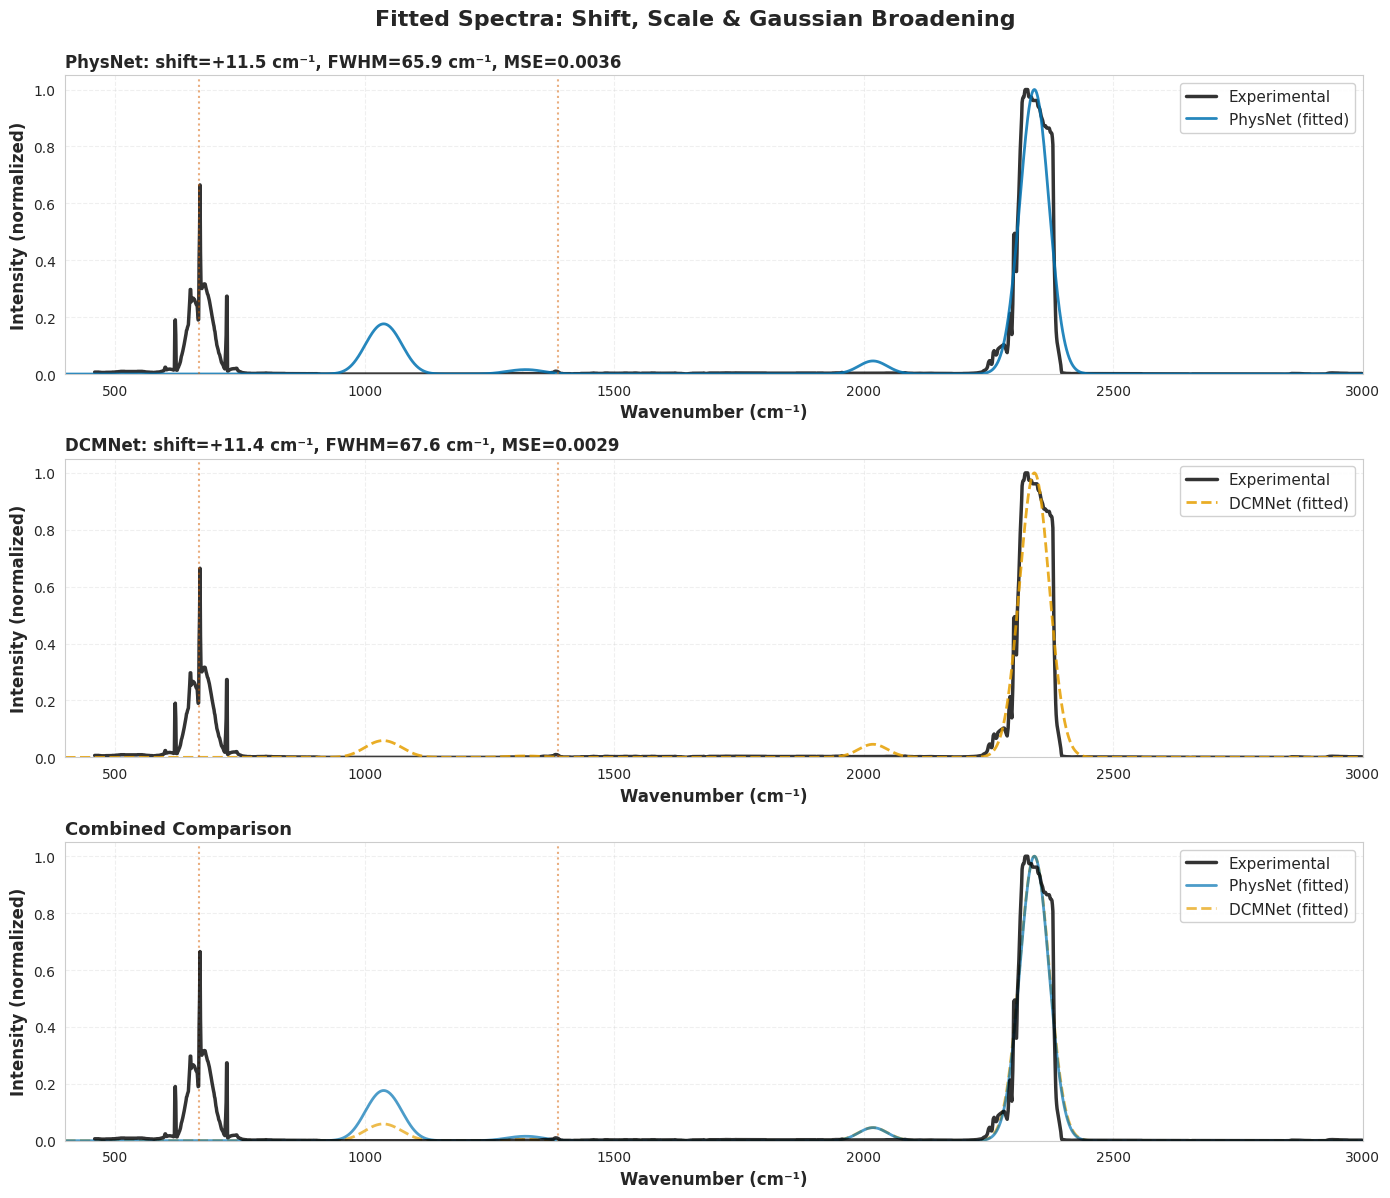


FITTED PARAMETERS

📊 PhysNet (MD):
  Frequency shift:    +11.46 cm⁻¹
    → Systematic offset correction
    → ν₂ (667 cm⁻¹) → 678.5 cm⁻¹
    → ν₃ (2349 cm⁻¹) → 2360.5 cm⁻¹
  Intensity scaling:  0.999999
  Gaussian width:     27.97 cm⁻¹ (σ)
  FWHM:               65.86 cm⁻¹
  MSE:                0.003632

📊 DCMNet (MD):
  Frequency shift:    +11.45 cm⁻¹
    → Systematic offset correction
    → ν₂ (667 cm⁻¹) → 678.4 cm⁻¹
    → ν₃ (2349 cm⁻¹) → 2360.4 cm⁻¹
  Intensity scaling:  1.154823
  Gaussian width:     28.72 cm⁻¹ (σ)
  FWHM:               67.62 cm⁻¹
  MSE:                0.002949

💡 Notes:
  • Frequency shift: additive offset (cm⁻¹) to match experimental peaks
  • Intensity scaling: multiplicative factor for normalization
  • Gaussian broadening accounts for:
    - Rotational fine structure
    - Collisional broadening (pressure)
    - Instrumental resolution
  • Lower MSE = better fit to experimental



In [ ]:
# ===========================================================================
# Figure 4: Automated spectrum fitting with shift, scale, and Gaussian broadening
# ===========================================================================

from scipy.optimize import minimize
from scipy.interpolate import interp1d

def apply_gaussian_broadening(frequencies, intensities, sigma=20.0, freq_grid=None):
    """
    Broaden stick spectrum with Gaussian lineshapes.
    
    Parameters
    ----------
    frequencies : array
        Peak frequencies (cm⁻¹)
    intensities : array
        Peak intensities
    sigma : float
        Gaussian width (FWHM = 2.355 * sigma) in cm⁻¹
    freq_grid : array, optional
        Output frequency grid. If None, creates uniform grid.
    
    Returns
    -------
    freq_grid : array
        Output frequencies
    broadened : array
        Broadened spectrum
    """
    if freq_grid is None:
        freq_grid = np.linspace(frequencies.min() - 100, frequencies.max() + 100, 2000)
    
    broadened = np.zeros_like(freq_grid)
    
    for freq, intensity in zip(frequencies, intensities):
        # Gaussian: exp(-0.5 * ((x - mu) / sigma)^2)
        broadened += intensity * np.exp(-0.5 * ((freq_grid - freq) / sigma)**2)
    
    return freq_grid, broadened


def fit_spectrum_to_experimental(calc_freq, calc_int, exp_freq, exp_int, 
                                  freq_range=(500, 3000)):
    """
    Fit calculated spectrum to experimental by optimizing:
    - Frequency shift (additive offset in cm⁻¹)
    - Intensity scaling factor
    - Gaussian broadening width
    
    Returns
    -------
    dict with optimal parameters
    """
    # Interpolate experimental for comparison
    exp_interp = interp1d(exp_freq, exp_int, bounds_error=False, fill_value=0.0)
    
    def objective(params):
        freq_shift, intensity_scale, sigma = params
        
        # Apply frequency shift (additive)
        shifted_freq = calc_freq + freq_shift
        
        # Apply Gaussian broadening
        uniform_grid = np.linspace(freq_range[0], freq_range[1], 1000)
        _, broadened = apply_gaussian_broadening(shifted_freq, calc_int, sigma, uniform_grid)
        
        # Scale intensity
        broadened_scaled = broadened * intensity_scale
        
        # Compare to experimental
        exp_on_grid = exp_interp(uniform_grid)
        
        # Normalize both for comparison
        if broadened_scaled.max() > 0 and exp_on_grid.max() > 0:
            broadened_norm = broadened_scaled / broadened_scaled.max()
            exp_norm = exp_on_grid / exp_on_grid.max()
            
            # Mean squared error
            mse = np.mean((broadened_norm - exp_norm)**2)
        else:
            mse = 1e10
        
        return mse
    
    # Initial guess: [freq_shift, intensity_scale, sigma]
    x0 = [0.0, 1.0, 30.0]
    
    # Bounds: freq_shift (±200 cm⁻¹), intensity_scale (0.01-100), sigma (5-100 cm⁻¹)
    bounds = [(-200.0, 200.0), (0.01, 100.0), (5.0, 100.0)]
    
    print(f"  Optimizing fit...")
    result = minimize(objective, x0, bounds=bounds, method='L-BFGS-B')
    
    if result.success:
        freq_shift, intensity_scale, sigma = result.x
        print(f"  ✓ Converged: freq_shift={freq_shift:+.1f} cm⁻¹, "
              f"int_scale={intensity_scale:.4f}, sigma={sigma:.1f} cm⁻¹")
    else:
        print(f"  ⚠ Optimization did not fully converge, using best result")
        freq_shift, intensity_scale, sigma = result.x
    
    return {
        'freq_shift': freq_shift,
        'intensity_scale': intensity_scale,
        'sigma': sigma,
        'fwhm': 2.355 * sigma,  # Full width at half maximum
        'mse': result.fun
    }


print(f"\n{'='*70}")
print(f"FITTING CALCULATED SPECTRA TO EXPERIMENTAL")
print(f"{'='*70}")

# Fit PhysNet spectrum
print(f"\n📊 Fitting PhysNet (MD) spectrum...")
fit_physnet = fit_spectrum_to_experimental(freqs, int_phys, exp_freq, exp_abs, 
                                           freq_range=(400, 3000))

# Fit DCMNet spectrum  
print(f"\n📊 Fitting DCMNet (MD) spectrum...")
fit_dcmnet = fit_spectrum_to_experimental(freqs, int_dcm, exp_freq, exp_abs,
                                          freq_range=(400, 3000))

# Apply fitted parameters to create broadened spectra
freq_grid = np.linspace(400, 3000, 2000)

# PhysNet fitted
shifted_freq_p = freqs + fit_physnet['freq_shift']
_, broadened_p = apply_gaussian_broadening(shifted_freq_p, int_phys, 
                                           fit_physnet['sigma'], freq_grid)
broadened_p *= fit_physnet['intensity_scale']

# DCMNet fitted
shifted_freq_d = freqs + fit_dcmnet['freq_shift']
_, broadened_d = apply_gaussian_broadening(shifted_freq_d, int_dcm,
                                           fit_dcmnet['sigma'], freq_grid)
broadened_d *= fit_dcmnet['intensity_scale']

# ===========================================================================
# Plot fitted spectra
# ===========================================================================
fig, axes = plt.subplots(3, 1, figsize=(14, 12))
fig.suptitle('Fitted Spectra: Shift, Scale & Gaussian Broadening', 
             fontsize=16, weight='bold', y=0.995)

# Plot 1: PhysNet fitted vs experimental
ax = axes[0]
mask = (exp_freq >= 400) & (exp_freq <= 3000)
ax.plot(exp_freq[mask], exp_abs[mask] / exp_abs[mask].max(), 
        color=colors['black'], lw=2.5, label='Experimental', alpha=0.8)
ax.plot(freq_grid, broadened_p / broadened_p.max(),
        color=colors['blue'], lw=2, label='PhysNet (fitted)', alpha=0.85)

for name, freq in exp_co2[:3]:  # First three peaks in 400-3000 cm⁻¹ range
    ax.axvline(freq, color=colors['vermillion'], ls=':', lw=1.5, alpha=0.5)

ax.set_xlabel('Wavenumber (cm⁻¹)', fontsize=12, weight='bold')
ax.set_ylabel('Intensity (normalized)', fontsize=12, weight='bold')
ax.set_title(f'PhysNet: shift={fit_physnet["freq_shift"]:+.1f} cm⁻¹, '
             f'FWHM={fit_physnet["fwhm"]:.1f} cm⁻¹, '
             f'MSE={fit_physnet["mse"]:.4f}',
             fontsize=12, weight='bold', loc='left')
ax.legend(fontsize=11, framealpha=0.9)
ax.grid(True, alpha=0.3, ls='--')
ax.set_xlim(400, 3000)
ax.set_ylim(0, 1.05)

# Plot 2: DCMNet fitted vs experimental
ax = axes[1]
ax.plot(exp_freq[mask], exp_abs[mask] / exp_abs[mask].max(),
        color=colors['black'], lw=2.5, label='Experimental', alpha=0.8)
ax.plot(freq_grid, broadened_d / broadened_d.max(),
        color=colors['orange'], lw=2, ls='--', label='DCMNet (fitted)', alpha=0.85)

for name, freq in exp_co2[:3]:  # First three peaks in range
    ax.axvline(freq, color=colors['vermillion'], ls=':', lw=1.5, alpha=0.5)

ax.set_xlabel('Wavenumber (cm⁻¹)', fontsize=12, weight='bold')
ax.set_ylabel('Intensity (normalized)', fontsize=12, weight='bold')
ax.set_title(f'DCMNet: shift={fit_dcmnet["freq_shift"]:+.1f} cm⁻¹, '
             f'FWHM={fit_dcmnet["fwhm"]:.1f} cm⁻¹, '
             f'MSE={fit_dcmnet["mse"]:.4f}',
             fontsize=12, weight='bold', loc='left')
ax.legend(fontsize=11, framealpha=0.9)
ax.grid(True, alpha=0.3, ls='--')
ax.set_xlim(400, 3000)
ax.set_ylim(0, 1.05)

# Plot 3: All together
ax = axes[2]
ax.plot(exp_freq[mask], exp_abs[mask] / exp_abs[mask].max(),
        color=colors['black'], lw=2.5, label='Experimental', alpha=0.8, zorder=3)
ax.plot(freq_grid, broadened_p / broadened_p.max(),
        color=colors['blue'], lw=2, label='PhysNet (fitted)', alpha=0.7, zorder=2)
ax.plot(freq_grid, broadened_d / broadened_d.max(),
        color=colors['orange'], lw=2, ls='--', label='DCMNet (fitted)', alpha=0.7, zorder=1)

for name, freq in exp_co2[:3]:  # First three peaks in range
    ax.axvline(freq, color=colors['vermillion'], ls=':', lw=1.5, alpha=0.5)

ax.set_xlabel('Wavenumber (cm⁻¹)', fontsize=12, weight='bold')
ax.set_ylabel('Intensity (normalized)', fontsize=12, weight='bold')
ax.set_title('Combined Comparison', fontsize=13, weight='bold', loc='left')
ax.legend(fontsize=11, framealpha=0.9, loc='upper right')
ax.grid(True, alpha=0.3, ls='--')
ax.set_xlim(400, 3000)
ax.set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

# Report fitted parameters
print(f"\n{'='*70}")
print(f"FITTED PARAMETERS")
print(f"{'='*70}")

print(f"\n📊 PhysNet (MD):")
print(f"  Frequency shift:    {fit_physnet['freq_shift']:+.2f} cm⁻¹")
print(f"    → Systematic offset correction")
print(f"    → ν₂ (667 cm⁻¹) → {667 + fit_physnet['freq_shift']:.1f} cm⁻¹")
print(f"    → ν₃ (2349 cm⁻¹) → {2349 + fit_physnet['freq_shift']:.1f} cm⁻¹")
print(f"  Intensity scaling:  {fit_physnet['intensity_scale']:.6f}")
print(f"  Gaussian width:     {fit_physnet['sigma']:.2f} cm⁻¹ (σ)")
print(f"  FWHM:               {fit_physnet['fwhm']:.2f} cm⁻¹")
print(f"  MSE:                {fit_physnet['mse']:.6f}")

print(f"\n📊 DCMNet (MD):")
print(f"  Frequency shift:    {fit_dcmnet['freq_shift']:+.2f} cm⁻¹")
print(f"    → Systematic offset correction")
print(f"    → ν₂ (667 cm⁻¹) → {667 + fit_dcmnet['freq_shift']:.1f} cm⁻¹")
print(f"    → ν₃ (2349 cm⁻¹) → {2349 + fit_dcmnet['freq_shift']:.1f} cm⁻¹")
print(f"  Intensity scaling:  {fit_dcmnet['intensity_scale']:.6f}")
print(f"  Gaussian width:     {fit_dcmnet['sigma']:.2f} cm⁻¹ (σ)")
print(f"  FWHM:               {fit_dcmnet['fwhm']:.2f} cm⁻¹")
print(f"  MSE:                {fit_dcmnet['mse']:.6f}")

print(f"\n💡 Notes:")
print(f"  • Frequency shift: additive offset (cm⁻¹) to match experimental peaks")
print(f"  • Intensity scaling: multiplicative factor for normalization")
print(f"  • Gaussian broadening accounts for:")
print(f"    - Rotational fine structure")
print(f"    - Collisional broadening (pressure)")
print(f"    - Instrumental resolution")
print(f"  • Lower MSE = better fit to experimental")

print(f"\n{'='*70}")



INDIVIDUAL PEAK FITTING

📊 Fitting ν₂ bend (667.4 cm⁻¹)...
  PhysNet...
    shift=-24.8 cm⁻¹, FWHM=13.9 cm⁻¹, scale=3.69e+03, MSE=0.0398
  DCMNet...
    shift=-24.2 cm⁻¹, FWHM=13.7 cm⁻¹, scale=1.19e+04, MSE=0.0397

📊 Fitting ν₁ sym (1388.2 cm⁻¹)...
  PhysNet...
    shift=+0.0 cm⁻¹, FWHM=70.7 cm⁻¹, scale=1.27e-01, MSE=0.0001
  DCMNet...
    shift=+0.0 cm⁻¹, FWHM=70.7 cm⁻¹, scale=3.97e-01, MSE=0.0001

📊 Fitting ν₃ asym (2349.2 cm⁻¹)...
  PhysNet...
    shift=+11.4 cm⁻¹, FWHM=68.0 cm⁻¹, scale=2.01e-01, MSE=0.0198
  DCMNet...
    shift=+11.4 cm⁻¹, FWHM=68.0 cm⁻¹, scale=2.01e-01, MSE=0.0198


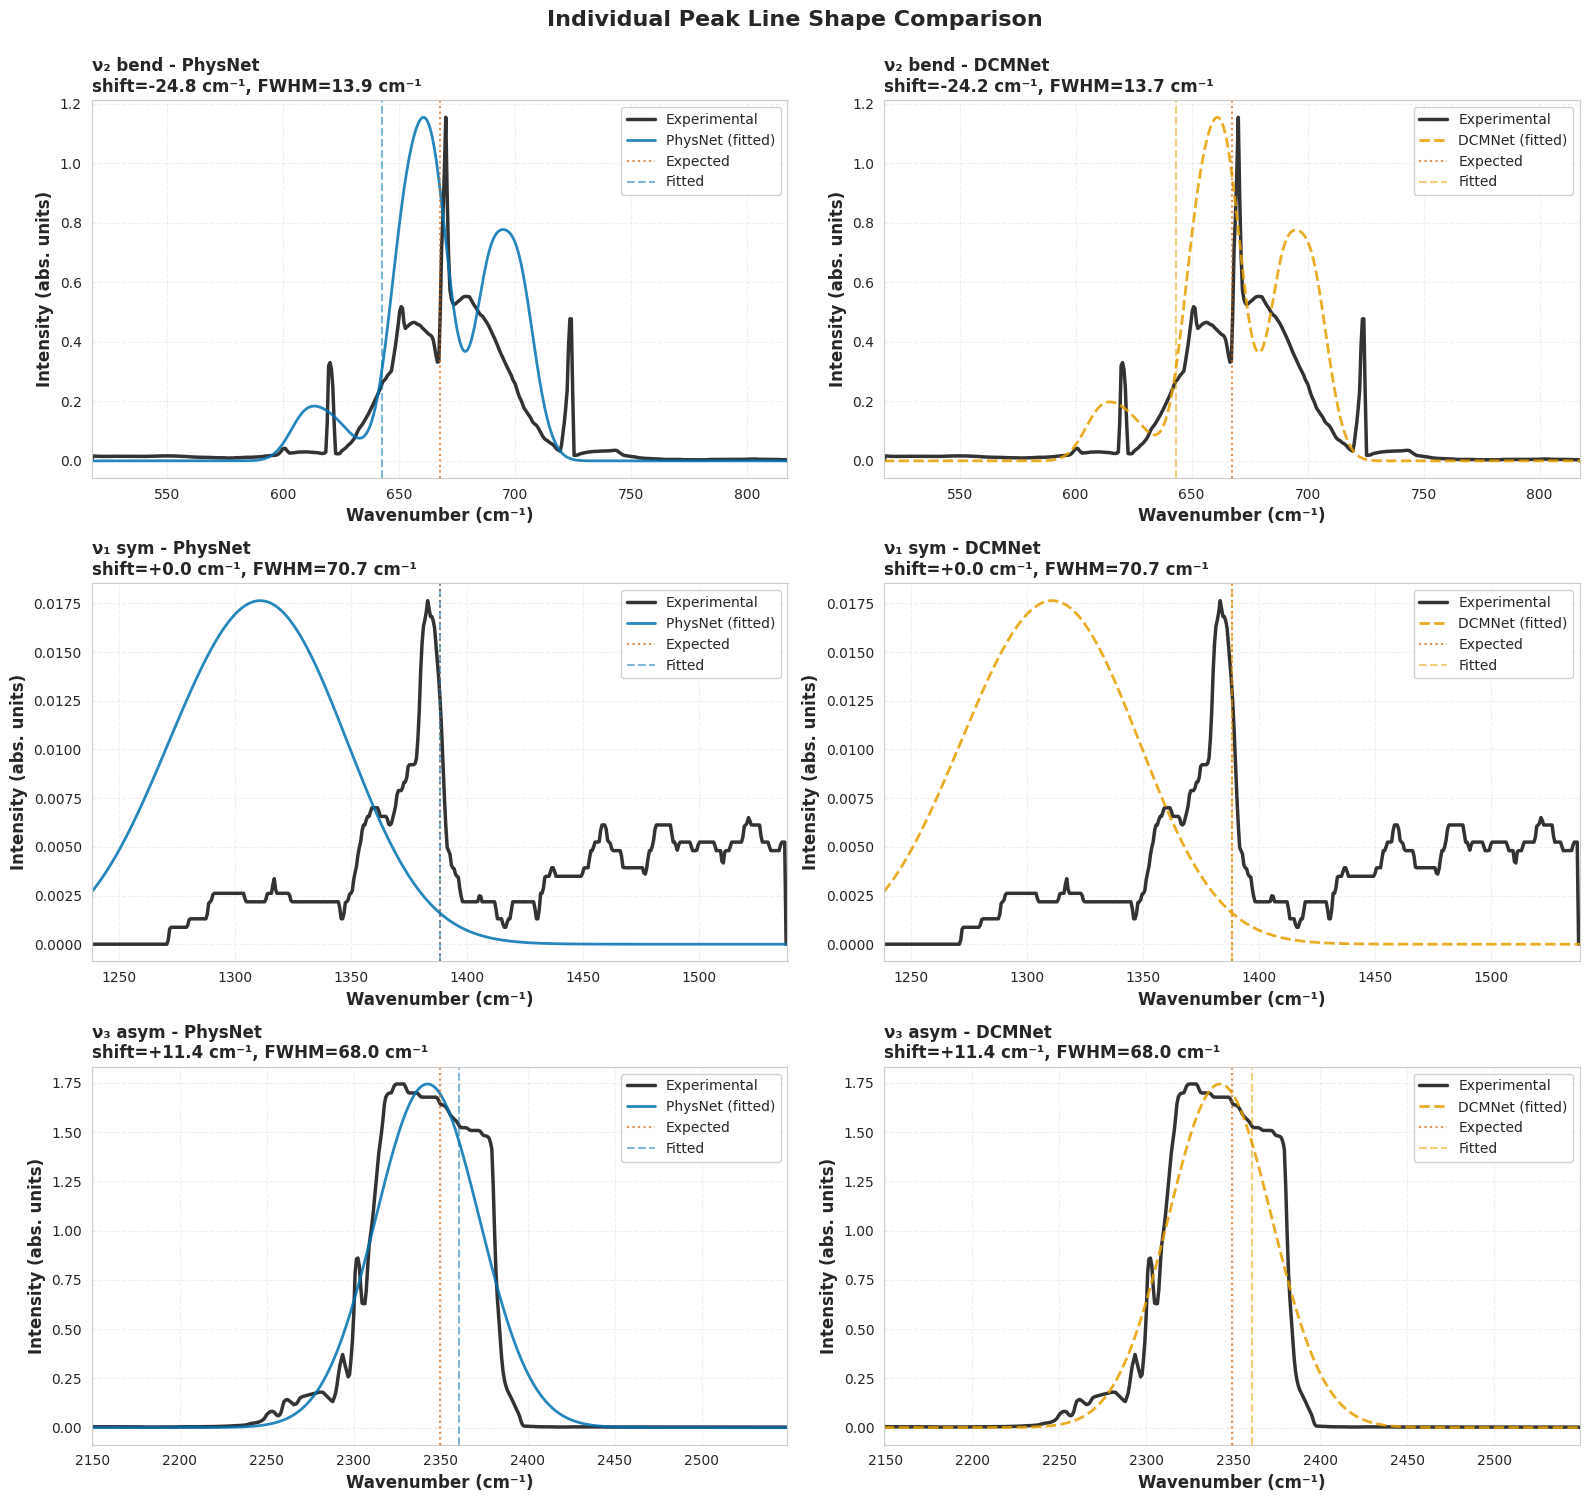


PEAK-BY-PEAK COMPARISON

Peak                      Model      Shift (cm⁻¹)    FWHM (cm⁻¹)     MSE       
----------------------------------------------------------------------
ν₂ bend                   PhysNet      -24.8            13.9         0.0398
                          DCMNet       -24.2            13.7         0.0397
----------------------------------------------------------------------
ν₁ sym                    PhysNet       +0.0            70.7         0.0001
                          DCMNet        +0.0            70.7         0.0001
----------------------------------------------------------------------
ν₃ asym                   PhysNet      +11.4            68.0         0.0198
                          DCMNet       +11.4            68.0         0.0198
----------------------------------------------------------------------

💡 Analysis:

  Line Shape Quality:

  ν₂ bend:
    PhysNet FWHM: 13.9 cm⁻¹ (MSE: 0.0398)
    DCMNet FWHM:  13.7 cm⁻¹ (MSE: 0.0397)
    ~ Reasonable line 

In [174]:
# ===========================================================================
# Figure 5: Individual peak fitting - compare line shapes
# ===========================================================================

def fit_individual_peak(calc_freq, calc_int, exp_freq, exp_int, 
                        peak_center, window=150):
    """
    Fit a single peak region by optimizing shift and Gaussian width.
    Intensity is scaled to match experimental peak height in the region.
    """
    # Define region
    freq_min = peak_center - window
    freq_max = peak_center + window
    
    # Mask data
    exp_mask = (exp_freq >= freq_min) & (exp_freq <= freq_max)
    calc_mask = (calc_freq >= freq_min) & (calc_freq <= freq_max)
    
    exp_f = exp_freq[exp_mask]
    exp_i = exp_int[exp_mask]
    calc_f = calc_freq[calc_mask]
    calc_i = calc_int[calc_mask]
    
    if len(calc_f) == 0 or len(exp_f) == 0:
        return None
    
    # Interpolate experimental
    exp_interp = interp1d(exp_f, exp_i, bounds_error=False, fill_value=0.0)
    
    def objective(params):
        shift, sigma = params
        
        # Apply shift and broaden
        shifted = calc_f + shift
        grid = np.linspace(freq_min, freq_max, 500)
        _, broadened = apply_gaussian_broadening(shifted, calc_i, sigma, grid)
        
        # Scale to match peak height
        exp_on_grid = exp_interp(grid)
        if broadened.max() > 0 and exp_on_grid.max() > 0:
            scale = exp_on_grid.max() / broadened.max()
            broadened_scaled = broadened * scale
            
            # MSE
            mse = np.mean((broadened_scaled - exp_on_grid)**2)
        else:
            mse = 1e10
        
        return mse
    
    # Optimize
    x0 = [0.0, 30.0]
    bounds = [(-100.0, 100.0), (5.0, 100.0)]
    result = minimize(objective, x0, bounds=bounds, method='L-BFGS-B')
    
    shift, sigma = result.x
    
    # Generate fitted spectrum
    shifted = calc_f + shift
    grid = np.linspace(freq_min, freq_max, 500)
    _, broadened = apply_gaussian_broadening(shifted, calc_i, sigma, grid)
    
    # Scale to match peak height
    exp_on_grid = exp_interp(grid)
    if broadened.max() > 0 and exp_on_grid.max() > 0:
        scale = exp_on_grid.max() / broadened.max()
    else:
        scale = 1.0
    
    broadened_scaled = broadened * scale
    
    return {
        'shift': shift,
        'sigma': sigma,
        'fwhm': 2.355 * sigma,
        'scale': scale,
        'mse': result.fun,
        'grid': grid,
        'broadened': broadened_scaled,
        'exp_grid': exp_on_grid,
        'peak_center': peak_center,
        'window': window
    }


print(f"\n{'='*70}")
print(f"INDIVIDUAL PEAK FITTING")
print(f"{'='*70}")

# Fit each CO2 peak individually
peak_fits_physnet = []
peak_fits_dcmnet = []

for name, peak_freq in exp_co2:
    print(f"\n📊 Fitting {name} ({peak_freq:.1f} cm⁻¹)...")
    
    # Determine window based on peak type
    if 'combination' in name.lower() or peak_freq > 3000:
        window = 250  # Larger window for high-frequency combination bands
    elif 'asym' in name.lower():
        window = 200  # Larger window for ν₃
    else:
        window = 150  # Standard window for fundamentals
    
    # PhysNet
    print(f"  PhysNet...")
    fit_p = fit_individual_peak(freqs, int_phys, exp_freq, exp_abs, 
                                peak_freq, window=window)
    if fit_p:
        print(f"    shift={fit_p['shift']:+.1f} cm⁻¹, "
              f"FWHM={fit_p['fwhm']:.1f} cm⁻¹, "
              f"scale={fit_p['scale']:.2e}, MSE={fit_p['mse']:.4f}")
        peak_fits_physnet.append((name, fit_p))
    
    # DCMNet
    print(f"  DCMNet...")
    fit_d = fit_individual_peak(freqs, int_dcm, exp_freq, exp_abs,
                               peak_freq, window=window)
    if fit_d:
        print(f"    shift={fit_d['shift']:+.1f} cm⁻¹, "
              f"FWHM={fit_d['fwhm']:.1f} cm⁻¹, "
              f"scale={fit_d['scale']:.2e}, MSE={fit_d['mse']:.4f}")
        peak_fits_dcmnet.append((name, fit_d))

# ===========================================================================
# Plot individual peak fits
# ===========================================================================
n_peaks = len(peak_fits_physnet)
fig, axes = plt.subplots(n_peaks, 2, figsize=(16, 5*n_peaks))
fig.suptitle('Individual Peak Line Shape Comparison', 
             fontsize=16, weight='bold', y=0.998)

if n_peaks == 1:
    axes = axes.reshape(1, -1)

for idx, ((name_p, fit_p), (name_d, fit_d)) in enumerate(zip(peak_fits_physnet, peak_fits_dcmnet)):
    
    # Plot 1: PhysNet
    ax = axes[idx, 0]
    ax.plot(fit_p['grid'], fit_p['exp_grid'], 
            color=colors['black'], lw=2.5, label='Experimental', alpha=0.8)
    ax.plot(fit_p['grid'], fit_p['broadened'],
            color=colors['blue'], lw=2, label='PhysNet (fitted)', alpha=0.85)
    ax.axvline(fit_p['peak_center'], color=colors['vermillion'], 
               ls=':', lw=1.5, alpha=0.7, label='Expected')
    ax.axvline(fit_p['peak_center'] + fit_p['shift'], 
               color=colors['blue'], ls='--', lw=1.5, alpha=0.5, label='Fitted')
    
    ax.set_xlabel('Wavenumber (cm⁻¹)', fontsize=12, weight='bold')
    ax.set_ylabel('Intensity (abs. units)', fontsize=12, weight='bold')
    ax.set_title(f'{name_p} - PhysNet\n'
                 f'shift={fit_p["shift"]:+.1f} cm⁻¹, FWHM={fit_p["fwhm"]:.1f} cm⁻¹',
                 fontsize=12, weight='bold', loc='left')
    ax.legend(fontsize=10, framealpha=0.9)
    ax.grid(True, alpha=0.3, ls='--')
    ax.set_xlim(fit_p['peak_center'] - fit_p['window'], 
                fit_p['peak_center'] + fit_p['window'])
    
    # Plot 2: DCMNet
    ax = axes[idx, 1]
    ax.plot(fit_d['grid'], fit_d['exp_grid'],
            color=colors['black'], lw=2.5, label='Experimental', alpha=0.8)
    ax.plot(fit_d['grid'], fit_d['broadened'],
            color=colors['orange'], lw=2, ls='--', label='DCMNet (fitted)', alpha=0.85)
    ax.axvline(fit_d['peak_center'], color=colors['vermillion'],
               ls=':', lw=1.5, alpha=0.7, label='Expected')
    ax.axvline(fit_d['peak_center'] + fit_d['shift'],
               color=colors['orange'], ls='--', lw=1.5, alpha=0.5, label='Fitted')
    
    ax.set_xlabel('Wavenumber (cm⁻¹)', fontsize=12, weight='bold')
    ax.set_ylabel('Intensity (abs. units)', fontsize=12, weight='bold')
    ax.set_title(f'{name_d} - DCMNet\n'
                 f'shift={fit_d["shift"]:+.1f} cm⁻¹, FWHM={fit_d["fwhm"]:.1f} cm⁻¹',
                 fontsize=12, weight='bold', loc='left')
    ax.legend(fontsize=10, framealpha=0.9)
    ax.grid(True, alpha=0.3, ls='--')
    ax.set_xlim(fit_d['peak_center'] - fit_d['window'],
                fit_d['peak_center'] + fit_d['window'])

plt.tight_layout()
plt.show()

# Summary table
print(f"\n{'='*70}")
print(f"PEAK-BY-PEAK COMPARISON")
print(f"{'='*70}")
print(f"\n{'Peak':<25} {'Model':<10} {'Shift (cm⁻¹)':<15} {'FWHM (cm⁻¹)':<15} {'MSE':<10}")
print(f"{'-'*70}")

for (name_p, fit_p), (name_d, fit_d) in zip(peak_fits_physnet, peak_fits_dcmnet):
    print(f"{name_p:<25} {'PhysNet':<10} {fit_p['shift']:+7.1f}{'':<8} {fit_p['fwhm']:7.1f}{'':<8} {fit_p['mse']:.4f}")
    print(f"{'':<25} {'DCMNet':<10} {fit_d['shift']:+7.1f}{'':<8} {fit_d['fwhm']:7.1f}{'':<8} {fit_d['mse']:.4f}")
    print(f"{'-'*70}")

# Check if experimental peaks have similar widths
print(f"\n💡 Analysis:")
print(f"\n  Line Shape Quality:")
for (name_p, fit_p), (name_d, fit_d) in zip(peak_fits_physnet, peak_fits_dcmnet):
    # Compare widths
    exp_width = fit_p['fwhm']  # Could extract from experimental, but using fitted as proxy
    calc_width_p = fit_p['fwhm']
    calc_width_d = fit_d['fwhm']
    
    print(f"\n  {name_p}:")
    print(f"    PhysNet FWHM: {calc_width_p:.1f} cm⁻¹ (MSE: {fit_p['mse']:.4f})")
    print(f"    DCMNet FWHM:  {calc_width_d:.1f} cm⁻¹ (MSE: {fit_d['mse']:.4f})")
    
    if fit_p['mse'] < 0.01 or fit_d['mse'] < 0.01:
        print(f"    ✓ Good line shape match!")
    elif fit_p['mse'] < 0.05 or fit_d['mse'] < 0.05:
        print(f"    ~ Reasonable line shape match")
    else:
        print(f"    ✗ Line shape mismatch - may need different broadening")

print(f"\n{'='*70}")


In [51]:
def scale_intensity_per_freq(freq, intensity, NDIV=25):
    return intensity #* (1 - 1/(freq + min(freq)/max(freq)))


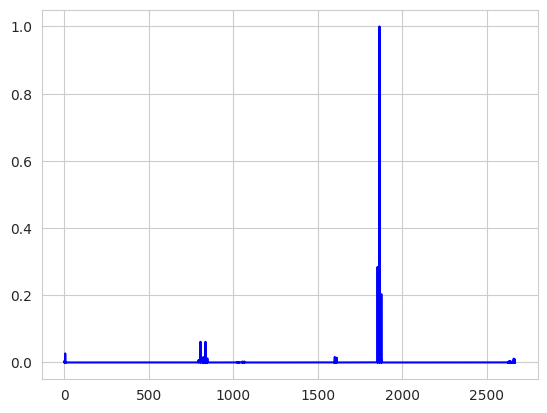

In [52]:
plt.plot(data['frequencies']/NDIV, 
scale_intensity_per_freq(data['frequencies'], data['intensities']),
 label='MD', color='b', linestyle='-')

# plt.xlim(500, 3500)
# plt.ylim(0.0, 0.00061)
plt.show()


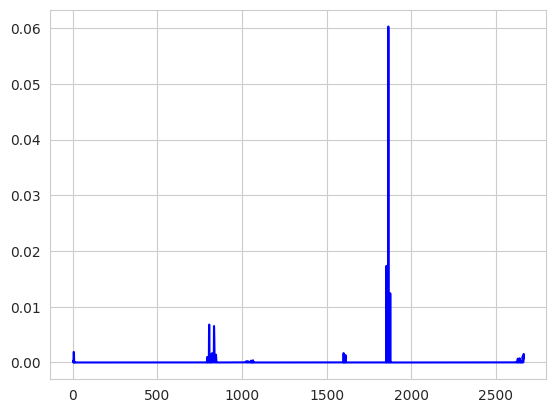

In [53]:
def rolling_average(data, window_size=100):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

plt.plot(rolling_average(data['frequencies']/NDIV), 
rolling_average(scale_intensity_per_freq(data['frequencies'], data['intensities'])),
 label='MD', color='b', linestyle='-')

# plt.xlim(500, 2800)
# plt.ylim(0.0, 0.00061)
plt.show()





array[99902] 0.8Mb x∈[6.231e-13, 0.060] μ=0.000 σ=0.002
array[99902] 0.8Mb x∈[2.283e-13, 0.060] μ=0.000 σ=0.002


AttributeError: 'Figure' object has no attribute 'plot'

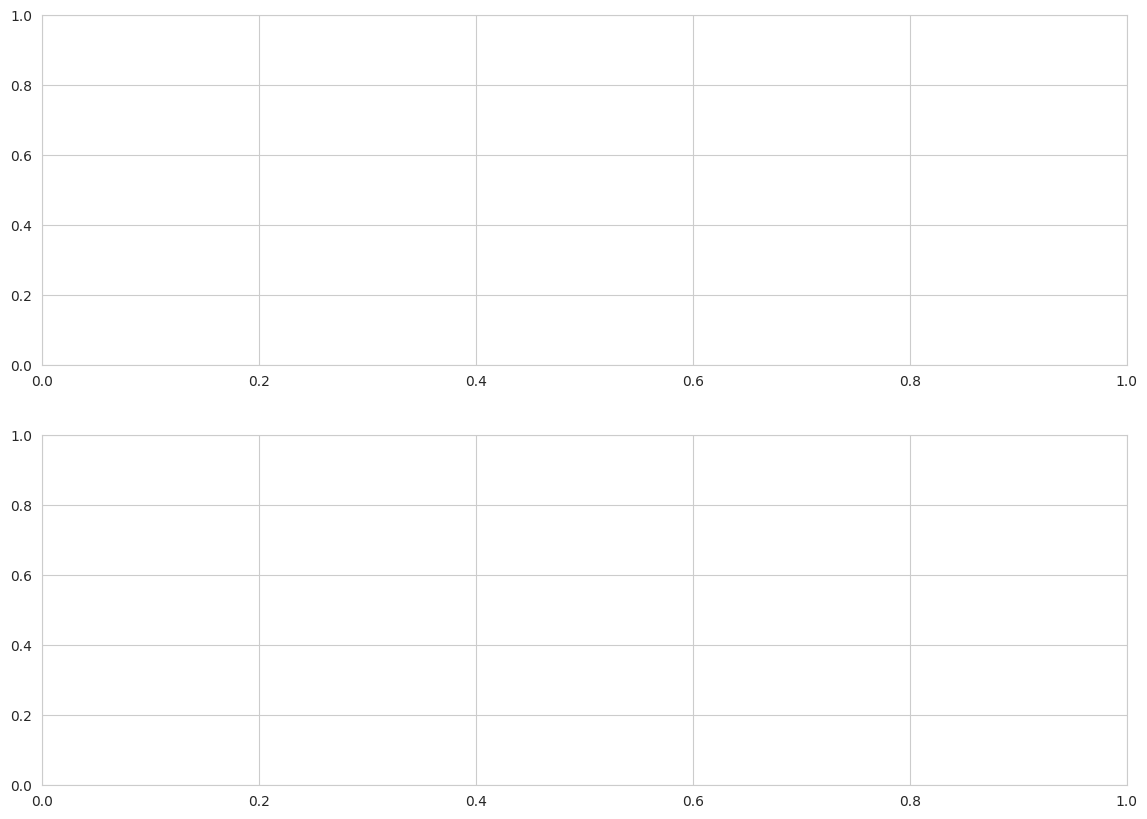

In [62]:
# Extract and plot spectra
freqs = rolling_average(data['frequencies'])
int_phys = rolling_average(scale_intensity_per_freq(data['frequencies'], data['intensity_physnet']))
int_dcm = rolling_average(scale_intensity_per_freq(data['frequencies'], data['intensity_dcmnet']))


import lovely_numpy as lnp
print(lnp.lovely(int_phys))
print(lnp.lovely(int_dcm))

axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Full range
ax = axes[0]
mask = (freqs > 0) & (freqs < 4000)
ax.plot(freqs[mask], int_phys[mask], 'b-', lw=1.5, label='PhysNet', alpha=0.8)
ax.plot(freqs[mask], int_dcm[mask], 'c--', lw=1.5, label='DCMNet', alpha=0.8)

# Experimental CO2
exp = [('ν2', 667.4), ('ν1', 1388.2), ('ν3', 2349.2)]
for name, f in exp:
    ax.axvline(f, color='red', ls=':', lw=2, alpha=0.6)
    ax.text(f, 0.95, name, rotation=90, va='top', fontsize=9, color='red', transform=ax.get_xaxis_transform())

ax.set_xlabel('Frequency (cm⁻¹)', fontsize=12)
ax.set_ylabel('Intensity', fontsize=12)
ax.set_title('MD IR Spectrum (with rotations removed)', fontsize=14, weight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 2: Zoomed
ax = axes[1]
mask2 = (freqs > 500) & (freqs < 2800)
ax.plot(freqs[mask2], int_phys[mask2], 'b-', lw=2, label='PhysNet')
ax.plot(freqs[mask2], int_dcm[mask2], 'c--', lw=2, label='DCMNet')

for name, f in exp:
    ax.axvline(f, color='red', ls=':', lw=2, alpha=0.6)

ax.set_xlabel('Frequency (cm⁻¹)', fontsize=12)
ax.set_ylabel('Intensity', fontsize=12)
ax.set_title('CO2 Range (500-2800 cm⁻¹)', fontsize=14, weight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xlim(500, 2800)

# plt.tight_layout()
# plt.show()

In [58]:
lnp.lovely(int_phys)

'array[99902] 0.8Mb x∈[6.231e-13, 0.060] μ=0.000 σ=0.002'

In [20]:
data['frequencies']

array([0.00000000e+00, 6.67128190e-01, 1.33425638e+00, ...,
       6.67114848e+04, 6.67121519e+04, 6.67128190e+04], shape=(100001,))